##Our awesome trial analysis

This notebook uses the following libraries: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import data downloaded from github.com/swcarpentry/

In [4]:
gap_data = pd.read_csv("data/gapminder-FiveYearData.csv", header=0)

(Check)

In [14]:
#let's check whether the data read in properly
print gap_data[0:6]


       country  year       pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333      Asia   28.801  779.445314
1  Afghanistan  1957   9240934      Asia   30.332  820.853030
2  Afghanistan  1962  10267083      Asia   31.997  853.100710
3  Afghanistan  1967  11537966      Asia   34.020  836.197138
4  Afghanistan  1972  13079460      Asia   36.088  739.981106
5  Afghanistan  1977  14880372      Asia   38.438  786.113360


Extract information about population sizes (pop)

In [75]:
# now we're going to take this code, starting with "subset_data....", and we're going to make it a function with dataframe
# replace gap_data with df, and 1952 with year.

def pop_year(df, year):
    # doc string enclosed in 3 single quotes
    '''Function that calculates total pop per continent for a year. 
    Input: dataframe, year, Output: resulting dataframe'''
    #assert is inverted if/then statement: you want condition to be true, then comma, then error msg if not true!
    assert type(year) is int, "oh shit, argument ain't integeric number"
    assert year>1950, "oh damn, year is too early for this shitty data"
    subset_data = df[(df.year == year)] [["continent", "pop"]]
    pop_data = subset_data.groupby("continent").sum()
    pop_data = pop_data.sort("pop")
    return pop_data

print pop_year(gap_data, 1952)
#this last line will give the doc for this function in the help window
pop_year?

                    pop
continent              
Oceania    1.068601e+07
Africa     2.376405e+08
Americas   3.451524e+08
Europe     4.181208e+08
Asia       1.395357e+09


Plot my data

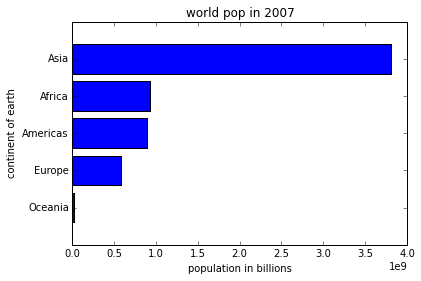

In [90]:
#now let's make this into a function 
#by changing 



def pop_plot(df, year):
    year_string = str(year)
    types = list(df.index)
    y_pos = np.arange(len(types))

    plt.barh(y_pos, df["pop"], align='center')
    plt.yticks(y_pos, types)
    plt.xlabel('population in billions')
    plt.ylabel('continent of earth')
    plt.title('world pop in '+year_string)
    plt.show()
pop_plot(pop_year(gap_data, year), year)

In [91]:
print gap_data.year.describe()

years = range(1952,2008,5)
#gives every 5 years from 1952-2007
print years

count    1704.00000
mean     1979.50000
std        17.26533
min      1952.00000
25%      1965.75000
50%      1979.50000
75%      1993.25000
max      2007.00000
Name: year, dtype: float64
[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]


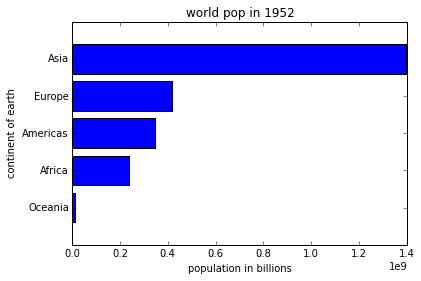

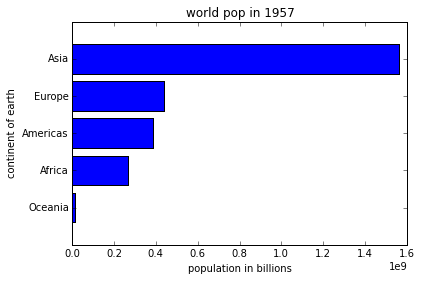

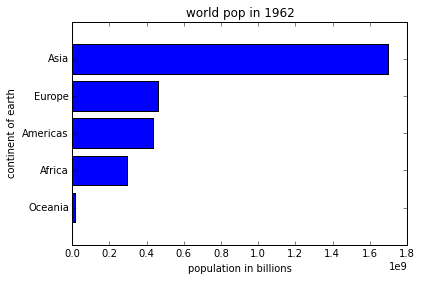

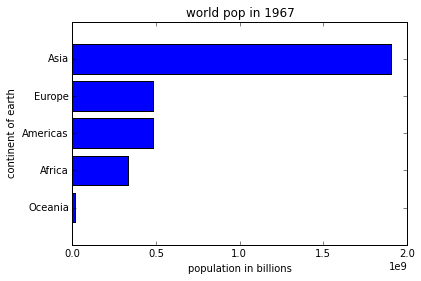

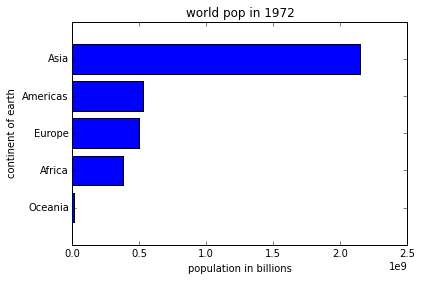

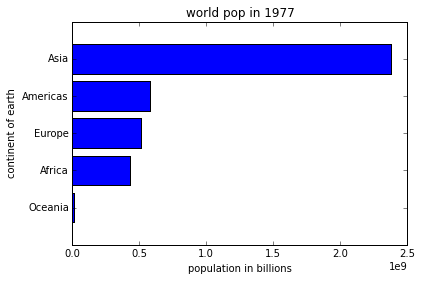

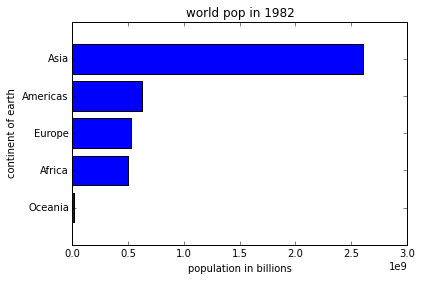

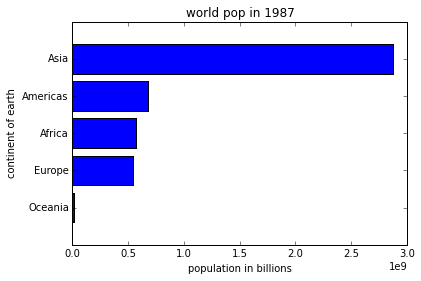

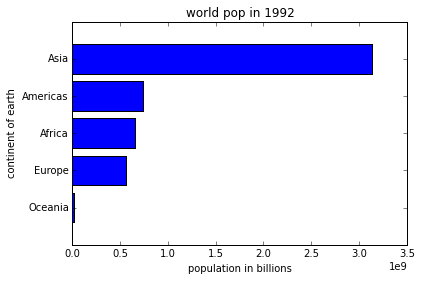

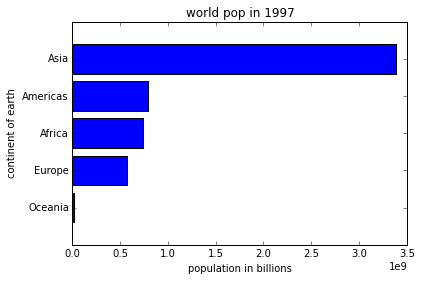

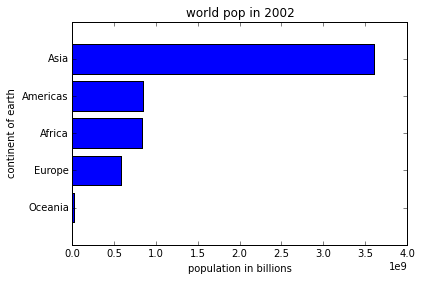

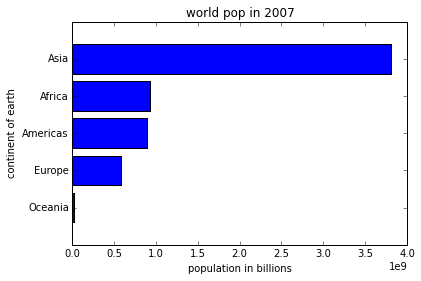

In [92]:
for year in years:
    pop_plot(pop_year(gap_data, year), year)